#Import

In [ ]:
import pandas as pd               # primary data structure library
import numpy as np                # library scientific computing in python 
import matplotlib.pyplot as plt   # for plotting 
from wordcloud import WordCloud   # for plot word cloud 
import folium                     # for geospatial plot
from folium import plugins        # for using plugins in folium
%matplotlib inline
pd.set_option("display.max.columns",None) # set to see all columns dataframe 

#Load Data

In [ ]:
london = pd.read_csv('london_crime_by_lsoa.csv')          # read csv data
london.head()                                             # show first 5 of london dataframe

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [ ]:
london.shape

(272985, 7)

In [ ]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272985 entries, 0 to 272984
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   lsoa_code       272985 non-null  object 
 1   borough         272985 non-null  object 
 2   major_category  272985 non-null  object 
 3   minor_category  272985 non-null  object 
 4   value           272984 non-null  float64
 5   year            272984 non-null  float64
 6   month           272984 non-null  float64
dtypes: float64(3), object(4)
memory usage: 14.6+ MB


In [ ]:
london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             1
year              1
month             1
dtype: int64

In [ ]:
crimes = london[london['value'] != 0]

In [ ]:
crimes

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1.0,2016.0,8.0
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1.0,2009.0,5.0
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2.0,2012.0,1.0
25,E01001794,Hackney,Violence Against the Person,Harassment,1.0,2013.0,2.0
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1.0,2016.0,4.0
...,...,...,...,...,...,...,...
272956,E01003713,Redbridge,Violence Against the Person,Harassment,1.0,2008.0,8.0
272962,E01003532,Newham,Burglary,Burglary in a Dwelling,1.0,2010.0,6.0
272969,E01032769,Tower Hamlets,Violence Against the Person,Harassment,3.0,2015.0,10.0
272977,E01000856,Camden,Robbery,Personal Property,1.0,2014.0,12.0


#Questions

### Q: What were the top 5 borough in London with the most crimes from 2008-2016?

In [ ]:
crimesborough = crimes.groupby('borough')['value'].sum().sort_values()

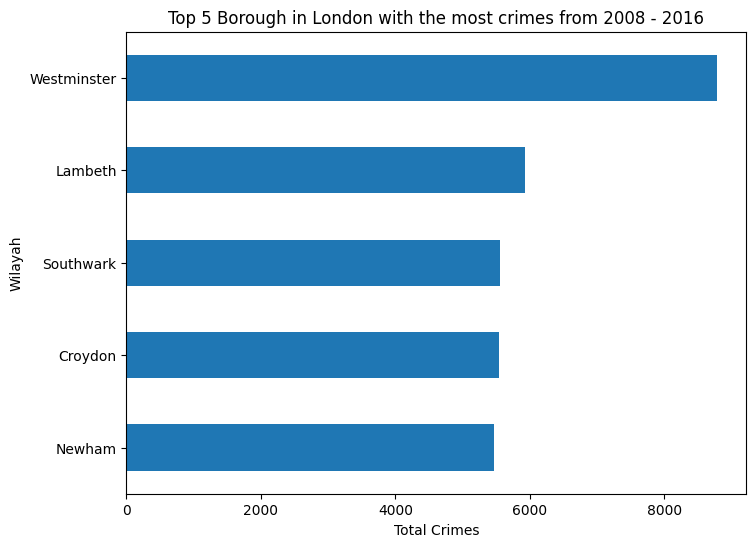

In [ ]:
crimesborough.tail().plot(kind='barh', figsize=(8,6))
plt.title('Top 5 Borough in London with the most crimes from 2008 - 2016') 
plt.ylabel('Wilayah')                                                             
plt.xlabel('Total Crimes')                                                 
plt.show()                                                                 

Kejahatan paling banyak pada tahun 2008 -2016 terletak pada wilayah Westminster, lalu Lambeth pada posisi kedua, dan disusul Southwark, Croydon, Newham pada posisi 3, 4, dan 5. 

### Q: What is the most happen major category crime that happen in the boroughs with the most crimes?

In [ ]:
# mendapatkan data diwilayah Westminster dan dikelompokkan menurut major category dan menjumlahkan value serta diurutkan
major_westminster = crimes[
    (crimes['borough'] == 'Westminster')
].groupby('major_category')['value'].sum().sort_values(ascending=False)

In [ ]:
def grouped(series):
    others = 0                         
    grouped = pd.Series(dtype=int)    
    for idx, val in series.items():   
        if val < series.quantile(0.5): 
            others += int(val) 
        else:
            grouped[idx] = int(val)
    grouped['Others'] = int(others)
    grouped.rename("Total")
    
    return grouped

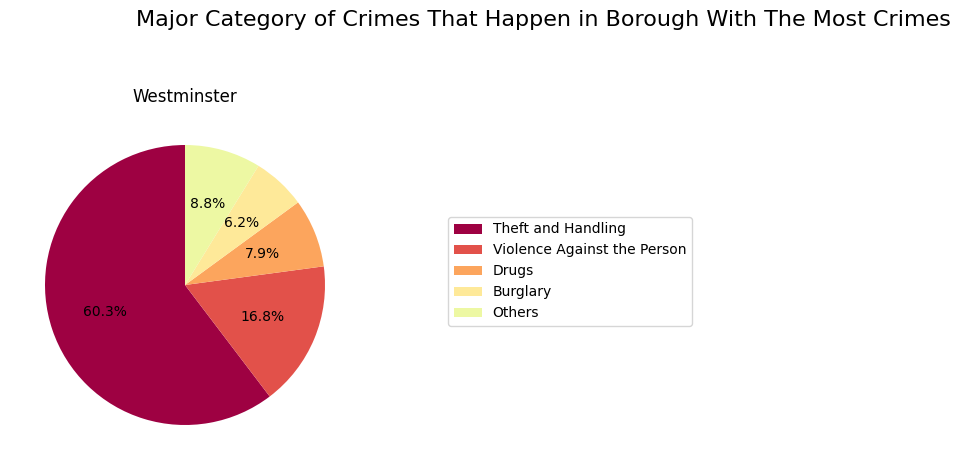

In [ ]:
pie_westminster = grouped(major_westminster)
fig = plt.figure(figsize=(18,10))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

ax1 = plt.subplot2grid((2,2), (0, 0))
plt.pie(pie_westminster,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Westminster')

fig.suptitle('Major Category of Crimes That Happen in Borough With The Most Crimes', fontsize=16)
fig.legend(labels=pie_westminster.index, loc='upper center', bbox_to_anchor=(0.515,0.78))
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa Kejahatan yang paling sering terjadi pada wilayah Westminster adalah pencurian.

### Q: How is the difference of frequency distribution of the Criminal Damage in 2016?

In [ ]:
criminaldamage_2016 = crimes[(crimes['major_category'] == 'Criminal Damage') & (crimes['year'] == 2016)].groupby(['borough','year'])['value'].sum().reset_index()

In [ ]:
criminaldamage_2016 = pd.pivot_table(criminaldamage_2016, values ='value', index ='borough', columns ='year')
criminaldamage_2016

year,2016.0
borough,
Barking and Dagenham,48.0
Barnet,40.0
Bexley,50.0
Brent,44.0
Bromley,39.0
Camden,48.0
Croydon,68.0
Ealing,53.0
Enfield,31.0


In [ ]:
count, bin_edges = np.histogram(criminaldamage_2016)
print(count)
print(bin_edges)

[5 2 1 7 3 8 3 1 0 2]
[17.  22.6 28.2 33.8 39.4 45.  50.6 56.2 61.8 67.4 73. ]


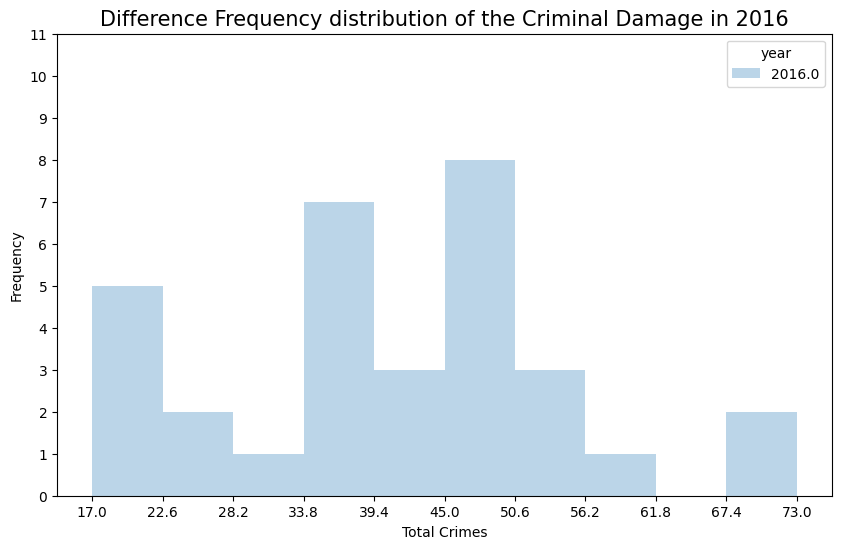

In [ ]:
criminaldamage_2016.plot(kind='hist', figsize=(10,6), xticks=bin_edges, yticks=[x for x in range(0,12)], alpha=0.3)
plt.title('Difference Frequency distribution of the Criminal Damage in 2016', fontsize=15) 
plt.xlabel('Total Crimes') 
plt.show() 

Berdasarkan grafik diatas dapat dilihat bahwa kejahatan yang paling banyak pada tahun 2016 yakni antara 45 - 50,6 dan paling minimum antara 28,2 - 33,8.

### Q: How each minor category of criminal damage compares to the other in their contributions to the total crimes in criminal damage? 

In [ ]:
minor_of_criminaldamage = crimes[crimes['major_category'] == 'Criminal Damage'].groupby(['minor_category', 'year'])[['value']].sum().reset_index()

In [ ]:
pivot_minor_criminaldamage = pd.pivot_table(minor_of_criminaldamage, values='value', index='year', columns='minor_category')
pivot_minor_criminaldamage

minor_category,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Other Criminal Damage
year,,,,
2008.0,448.0,841.0,174.0,336.0
2009.0,449.0,649.0,168.0,306.0
2010.0,392.0,664.0,152.0,364.0
2011.0,366.0,566.0,132.0,301.0
2012.0,296.0,527.0,150.0,288.0
2013.0,276.0,450.0,118.0,246.0
2014.0,269.0,472.0,103.0,341.0
2015.0,287.0,513.0,149.0,333.0
2016.0,267.0,560.0,123.0,358.0


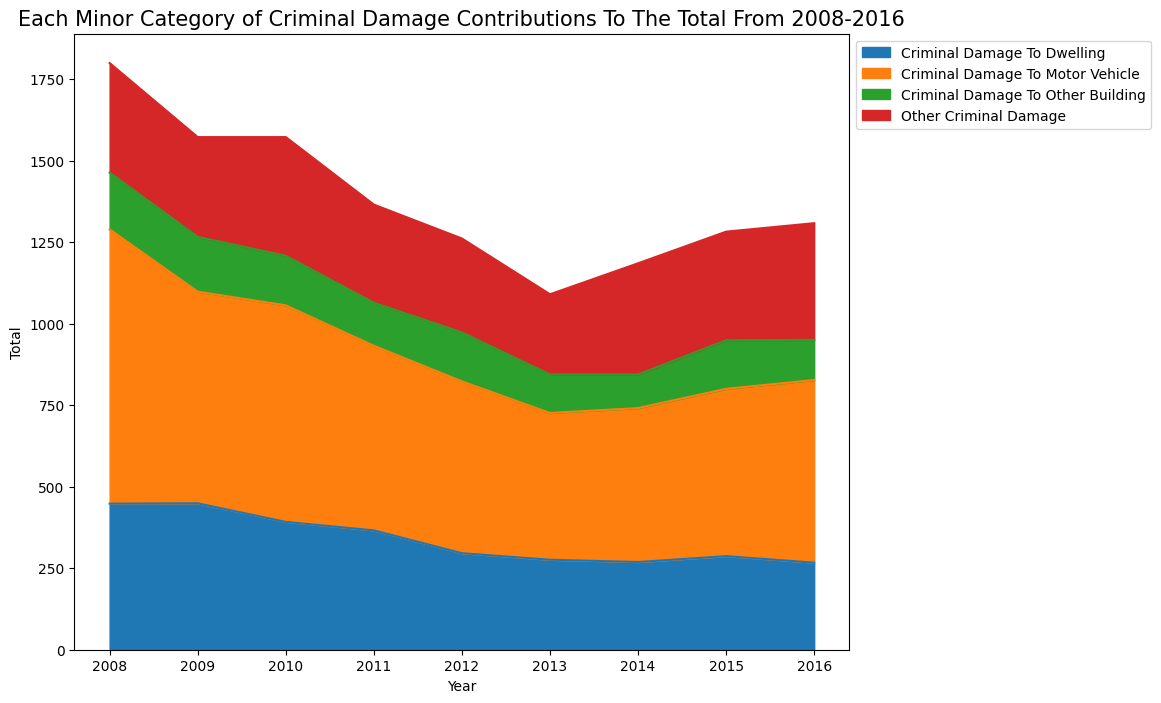

In [ ]:
pivot_minor_criminaldamage.plot(kind='area', figsize=(10,8))
plt.title('Each Minor Category of Criminal Damage Contributions To The Total From 2008-2016', fontsize=15)
plt.xlabel('Year') 
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

Berdasarkan plot diatas kejahatan paling banyak yakni selain criminal damage, disusul dengan kejahatan criminal damage to other building dalam rentang tahun 2008 hingga 2016.

### Q: How is the distributions of total crime by month (2014) in borough with the most crime?

In [ ]:
most_crimes = ['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']

df_boxplot = crimes[(crimes['borough'].isin(most_crimes)) & (crimes['year'] == 2014)].groupby(['borough','month'])['value'].sum().reset_index()

In [ ]:
df_boxplot = pd.pivot_table(df_boxplot, values='value', index='month', columns='borough')
df_boxplot

borough,Camden,Lambeth,Newham,Southwark,Westminster
month,,,,,
1.0,50.0,66.0,56.0,34.0,79.0
2.0,29.0,61.0,44.0,41.0,42.0
3.0,30.0,41.0,37.0,23.0,60.0
4.0,25.0,76.0,43.0,15.0,28.0
5.0,75.0,55.0,44.0,52.0,38.0
6.0,63.0,92.0,32.0,41.0,56.0
7.0,76.0,59.0,50.0,49.0,129.0
8.0,49.0,88.0,17.0,68.0,107.0
9.0,40.0,43.0,29.0,56.0,69.0


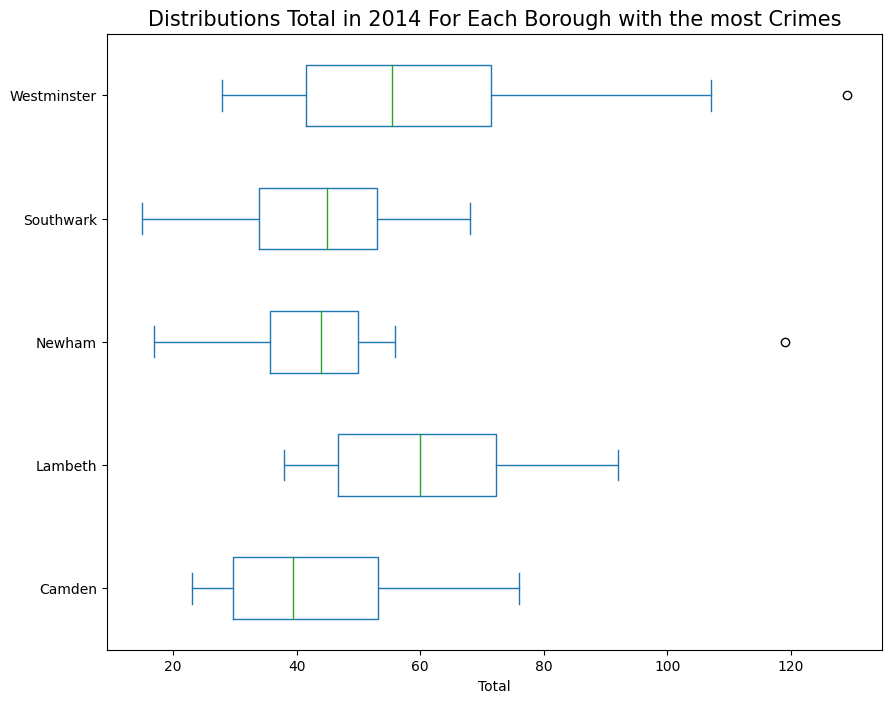

In [ ]:
df_boxplot.plot(kind='box', figsize=(10,8), vert=False)
plt.title('Distributions Total in 2014 For Each Borough with the most Crimes', fontsize=15) 
plt.xlabel('Total') 
plt.show()

### Q: How is the movement total of crime from 2010 to 2016?

In [ ]:
total_2016 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2016]['value'].sum()
total_2015 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2015]['value'].sum()
total_2014 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2014]['value'].sum()
total_2013 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2013]['value'].sum()
total_2012 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2012]['value'].sum()
total_2011 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2011]['value'].sum()
total_2010 = crimes[crimes['borough'] == 'Westminster'][crimes['year'] == 2010]['value'].sum()

In [ ]:
df_reported_crime = pd.DataFrame(
    data=[{'reported_crime':total_2010},
          {'reported_crime':total_2011},
          {'reported_crime':total_2012},
          {'reported_crime':total_2013},
          {'reported_crime':total_2014},
          {'reported_crime':total_2015},
          {'reported_crime':total_2016}], 
    index=[year for year in range(2010,2017)]
)
df_reported_crime = df_reported_crime.reset_index()

In [ ]:
df_reported_crime

,index,reported_crime
0,2010,702.0
1,2011,859.0
2,2012,1519.0
3,2013,1146.0
4,2014,752.0
5,2015,1011.0
6,2016,957.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


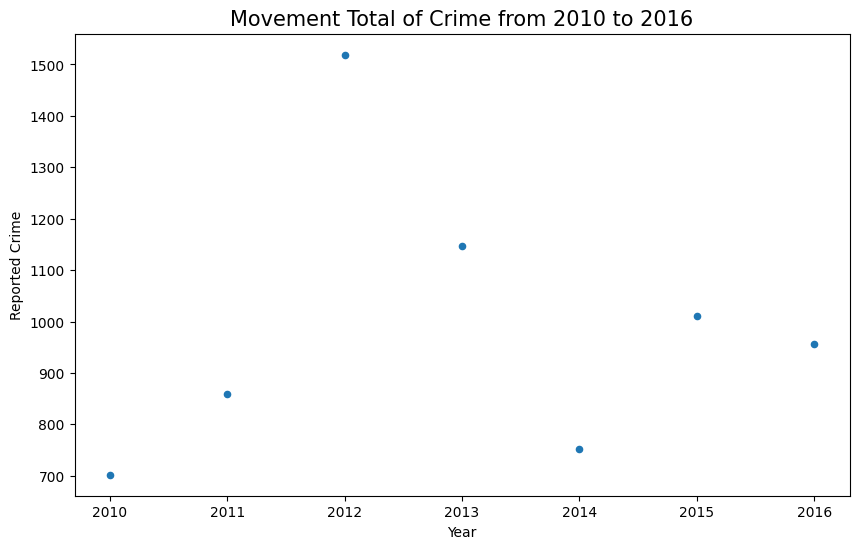

In [ ]:
df_reported_crime.plot(kind='scatter', x='index', y='reported_crime', figsize=(10,6), xticks=df_reported_crime['index'])
plt.title('Movement Total of Crime from 2010 to 2016', fontsize=15) 
plt.xlabel('Year')
plt.ylabel('Reported Crime')
plt.show()

Berdasarkan plot diatas total kasus kejahatan paling banyak pada tahun 2012 dengan total lebih dari 1500 kasus dan kejahatan paling sedikit pada tahun 2010 dengan total 700 kasus.

### Q: What were the top borough in London with the most Theft and Handling crimes from 2008-2016?

In [ ]:
crimes_Theft_and_Handling = crimes[crimes['major_category'] == 'Theft and Handling'].groupby(['borough'])[['value']].sum()

In [ ]:
word = '' 
for idx, val in zip(crimes_Theft_and_Handling.index.values, crimes_Theft_and_Handling['value']):
    split = idx.split(' ')
    
    if len(split) > 1:
        idx = ''.join(split)
        
    word += (idx + ' ') * val

word

In [ ]:
wordcloud = WordCloud(background_color='white', collocations=False, width=800, height=400).generate(word)

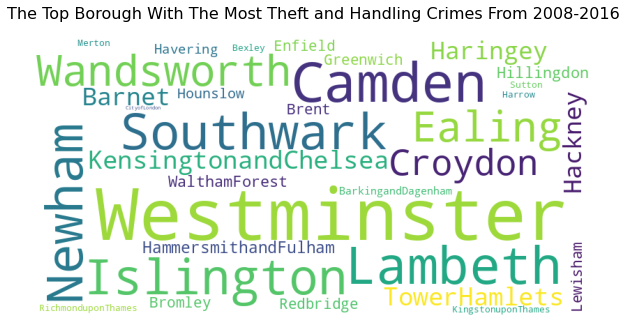

In [ ]:
plt.figure(figsize=(10,8)) 
plt.imshow(wordcloud)
plt.title('The Top Borough With The Most Theft and Handling Crimes From 2008-2016', fontsize=16, pad=20)
plt.axis('off')
plt.show()

### Q: What were the boroughs that are included in the high category based on value? 

In [ ]:
year_2016 = crimes[
    crimes['year'] == 2016
].groupby('borough')['value'].sum().reset_index()

In [ ]:
lat_long = [('City of London', 51.515556, -0.093056),('Kingston upon Thames', 51.408500, -0.306400),
            ('Richmond upon Thames', 51.447900, -0.326000),('Sutton', 51.361800, -0.194500),('Bexley', 51.454900, 0.150500),
            ('Merton',51.401400, -0.195800),('Harrow', 51.589800, -0.334600),('Havering', 51.581200,  0.183700),
            ('Barking and Dagenham', 51.560700, 0.155700),('Kensington and Chelsea', 51.502000, -0.194700),
            ('Greenwich', 51.489200, 0.064800),('Redbridge', 51.559000, 0.074100),('Bromley', 51.403900, 0.019800),
            ('Hammersmith and Fulham', 51.492700, -0.233900),('Hounslow', 51.474600, -0.368000),('Enfield', 51.653800, -0.079900),
            ('Waltham Forest', 51.590800, -0.013400),('Wandsworth', 51.456700, -0.191000),('Hillingdon', 51.544100, -0.476000),
            ('Barnet', 51.625200, -0.151700),('Haringey', 51.600000, -0.111900),('Lewisham', 51.445200, -0.020900),
            ('Hackney', 51.545000, -0.055300),('Brent', 51.558800, -0.281700),('Tower Hamlets', 51.509900, -0.005900),
            ('Islington', 51.541600, -0.102200),('Ealing', 51.513000, -0.308900),('Croydon', 51.371400, -0.097700),
            ('Newham', 51.507700, 0.046900),('Camden', 51.529000, -0.125500), ('Southwark',51.501720, -0.097960),
            ('Lambeth', 51.457150, -0.123068),('Westminster', 51.497300, -0.137200)]

In [ ]:
df = pd.DataFrame(lat_long, columns = ['borough','latitude', 'longitude'])

In [ ]:
df_merge = pd.merge(year_2016, df, on='borough', how='inner')
df_merge.sort_values(by=['value'], ascending=False).reset_index(drop = True).head(10)

,borough,value,latitude,longitude
0,Westminster,957.0,51.49730,-0.137200
1,Southwark,722.0,51.50172,-0.097960
2,Newham,719.0,51.50770,0.046900
3,Lambeth,664.0,51.45715,-0.123068
4,Croydon,651.0,51.37140,-0.097700
5,Haringey,597.0,51.60000,-0.111900
6,Tower Hamlets,585.0,51.50990,-0.005900
7,Ealing,548.0,51.51300,-0.308900
8,Hackney,539.0,51.54500,-0.055300
9,Camden,537.0,51.52900,-0.125500


In [ ]:
map = folium.Map(location=[51.507351, -0.127758],zoom_start=11)
folium.Marker([51.49730,	-0.137200],
              popup='1762').add_to(map)
folium.Marker([51.45715,	-0.123068],
              popup='1250').add_to(map)
folium.Marker([51.50770,	0.046900],
              popup='1234').add_to(map)
folium.Marker([51.50172,	-0.097960],
              popup='1155').add_to(map)
folium.Marker([51.50990,	-0.005900],
              popup='1074').add_to(map)
folium.Marker([51.37140,	-0.097700],
              popup='1073').add_to(map)
folium.Marker([51.52900,	-0.125500],
              popup='1002').add_to(map)
folium.Marker([51.60000,	-0.111900],
              popup='966').add_to(map)
folium.Marker([51.54500,	-0.055300],
              popup='965').add_to(map)
folium.Marker([51.51300,	-0.308900],
              popup='956').add_to(map)

map